In [1]:
# install sastrawi untuk kita gunakan stemming
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 8.7 MB/s 


In [7]:
# import library yang dibutuhkan
import re
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import timedelta, datetime
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud, STOPWORDS

# insialisasi sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# token API untuk autentikasi ke Twitter
access_token = "1539472360859807744-Z56zu2KW0b3bgHgul0gXyOb8IRp43K"
access_token_secret ="NOamZvH2yXLqfsk3DNDdk7GZvvIx40vAqIr4TWXPwt9xN"
consumer_key ="EDv8awDOHV9CLrku8ynIEZrV2"
consumer_secret="ikGgu3cBZlvWgmICoDFbjeJCedv1jCQWdxa4dBsI95KxBNETzp"

# autentikasi ke API Twitter
auth = tweepy.OAuthHandler (consumer_key,consumer_secret)
auth.set_access_token (access_token,access_token_secret)
api = tweepy.API(auth)


# insialisasi tanggal sekarang dan 7 hari sebelumnya
today = datetime.today().strftime("%Y-%m-%d")
last_week = datetime.today() - timedelta(7)
last_week = last_week.strftime("%Y-%m-%d")

# insialisasi kata kunci dan juga tanggal untuk dicari
search_words = "#jokowi OR jokowi OR presiden jokowi -filter:retweets"
date_since = last_week
date_until = today

# cari data dari twitter
tweets = tweepy.Cursor(
                    api.search, q=search_words, lang="id",  tweet_mode='extended').items(10)

# insialisasi hasil analisis
hasil_analisis = []

# fungsi untuk clean text
def cleanTxt(text):
  text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()) #remove @user, hashtag, dan link
  text = re.sub('RT[\s]+', '', text) # Removing RT
 
  return text

# fungsi untuk stemming text
def stemmTxt(text):
  return stemmer.stem(text)


# looping data tweet
for teks in tweets:
    teks_properties = {}
    teks_properties["tanggal"] = teks.created_at
    teks_properties["pengguna"] = teks.user.screen_name
    teks_properties["tweet"] = teks.full_text
    teks_properties["stemming & clean text"] = stemmTxt(teks_properties["tweet"])

    analysis = TextBlob(teks_properties["stemming & clean text"])

    #translate ke bahasa ingris (karena textblob adalah bahasa inggris)
    try :
        analysis = analysis.translate(to='en')
    except Exception as e:
        print(e)

    teks_properties["polarity"] = analysis.sentiment.polarity
    
    
    # analisis sentimen data twitter
    if analysis.sentiment.polarity > 0.0:
        teks_properties['sentiment'] = 'Positif'
    elif analysis.sentiment.polarity == 0.0:
        teks_properties['sentiment'] = 'Netral'
    else:
        teks_properties['sentiment'] = 'Negative'
    
    #Bersihkan duplikat
    if teks.retweet_count > 0:
        if teks_properties not in hasil_analisis:
            hasil_analisis.append(teks_properties)
    else:
        hasil_analisis.append(teks_properties)
        

'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'


In [8]:
# inisialisasi data frame
df = pd.DataFrame(hasil_analisis)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/PBA/dataset/data_tweets.csv')

In [ ]:
# print data positif
print('Tweet Positif:\n')
j=1
for i in range(0, df.shape[0] ):
  if( df['sentiment'][i] == 'Positif'):
    print(str(j) + ') '+df['tweet'][i])
    print()
    j=j+1

Tweet Positif:

1) Polri Hahaha malu gua baca laporan lu ke polisi Otak mana otak

2) EXOL COMBACK Subuh YumisCells2Ep8 Guru NINGNING REAL WORD TEASER nanamj Tidur AldebaranNeverReplaced Turu marselino WhyHerEp10 Jokowi YANG JUNGWOM FajRi TheGirlsAreBack D5 Malam Minggu

3) EXOL COMBACK Subuh YumisCells2Ep8 Guru NINGNING REAL WORD TEASER nanamj Tidur AldebaranNeverReplaced Turu marselino WhyHerEp10 Jokowi YANG JUNGWOM FajRi TheGirlsAreBack D5 Malam Minggu

4) Aska gm Hi hapsun Nnn Pil 1 911 Tidur Guru Turu Joji Jokowi Nang Vietnam Malam Minggu Marselino main nice

5) Hahaha udah curiga dari awal liat buzzer serempak posting misi perdamaian itu Bukan ga mendukung tapi cara buzzer meng up sungguh memalukan

6) rose Yg penting ada hasilnya nder Kali ini gw setuju Pak Jokowi amankan pasokan bahan baku indomih Karna cuman itu yg bsa jdi andalan kita kalo lgi krisis

7) risakotta Insha Allah lepas jadi presiden beliau jadi general sectrary UN neck

8) Kursi gaming Sapporo Comfy bingit mabar 

In [ ]:
# print data negatif
print('Tweet Negative:\n')
j=1
for i in range(0, df.shape[0] ):
  if( df['sentiment'][i] == 'Negative'):
    print(str(j) + ') '+df['tweet'][i])
    print()
    j=j+1

Tweet Negative:

1) didu PEMBENCI BAPAK PRESIDEN JOKOWI SEMAKIN STREESS KRN IRI DENGKI DGN GABGGUAN MENTAL AKUT MELIHAT KEHEBATAN BELIAU NEGARA MANA YG PUNYA NYALI SPT BELIAU NIH SIAPKAN MENTAL YA PARA HATERS BISA2 AUTO ODGJ JIKA BACA INI

2) herianto SE FAKTA APA KE JAHAT AN BRUTAL LOKASI JEJAK DIGITAL ADA DIMANA halu halus radikal

3) pink Saffira Polri Kadrun lg2 heleeeh

4) Saffira Polri Kominfo juga kebagian hapus2 akun platform medsos fake penyebar hoaks juga nggak sih

5) gagal dan belum berhasil dua hal yang berbeda meski artinya sama kita as college student udah pengalaman sama 2 frasa itu at least pas pengumuman sbm lah ya klo munculmya blm berhasil ya pasti artinya gagal bedanya pak jokowi gadikasih semangat aja

6) 2 negara sedang perang impossible stop setelah Jokowi temui baru sekali Apalagi ada nama besar Rusia AS dan NATO terlihat dalam perang itu Tetap butuh upaya diplomasi terus menerus dan kesabaran Semoga di G20 Bali bisa dilanjut lagi upaya damai bagi Rusia Ukraina

In [ ]:
# print data netral
print('Tweet Netral:\n')
j=1
for i in range(0, df.shape[0] ):
  if( df['sentiment'][i] == 'Netral'):
    print(str(j) + ') '+df['tweet'][i])
    print()
    j=j+1

Tweet Netral:

1) Malu aing

2) Opposite dumdum ekokuntadhi sadarlah wahai rakyat Indonesia

3) Prestasi menurut mereka adalah pembangunan infrastruktur Dan yg paling nyata adlh jalan Tol Setau sya jalan tol itu tdk bisa dinikmati oleh semua lapisan masyarakat Karena setau sya lagi yg namanya infrastruktur itu yg bisa dinikmati semua orang Jadi bagaimana

4) Luar biasa sikap pak jokowi saluuut

5) Wijaya008 Rass Salman7 aa misro TN1 20 Gpp suhu Pagiy SambungRetweeT TheLegends SobatNKRI Bersama Jokowi SobatNKRI e wee 14ku

6) E Berharap dan berusaha Misalnya Pakde lebih keras dikit sama Putin bilang kao ndak hentikan invasi Indonesia akan ikut kasih sangsi Putin itu dajjal gak bisa dibaikin Saya tidak rela kebaikan hati Pakde dimanfaatkan dan dianggap lemah oleh Putin

7) dirs dumdum Pranksiden ruwetnesia

8) Misi Jokowi Tak Gagal Meski Rusia Masih Serang Ukraina

9) didu Saya juga percaya jokowi eh tapi boong

10) wijayanto Sapa pun pemimpinya pasti ada kekurangany tapi kalau anda bila

In [ ]:
#Hitung Jumlah Sentiment Positif, Negative dan Netral
positive_count = df[df.sentiment == "Positif"].count()
neutral_count = df[df.sentiment == "Netral"].count()
negative_count = df[df.sentiment == "Negative"].count()
print("Positif: ",positive_count["sentiment"])
print("Negatif: ",negative_count["sentiment"])
print("Netral: ", neutral_count["sentiment"])

Positif:  43
Negatif:  14
Netral:  943


In [ ]:
# fungsi untuk memvisualisasikan data berbentuk pie
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

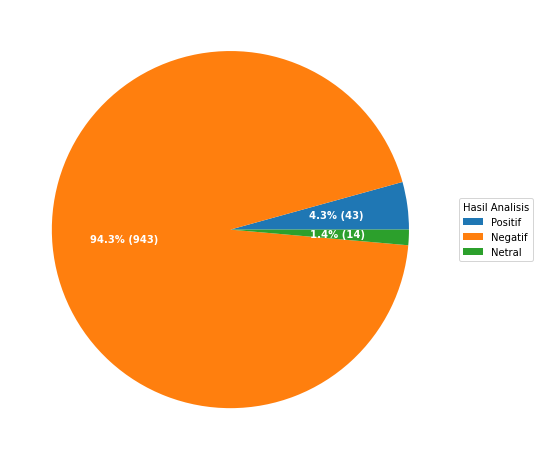

In [ ]:
# panggil fungsi show_pie
label = ['Positif', 'Negatif', 'Netral']
count_data = [positive_count["sentiment"], neutral_count["sentiment"], negative_count["sentiment"]]

show_pie(label, count_data, "Hasil Analisis")

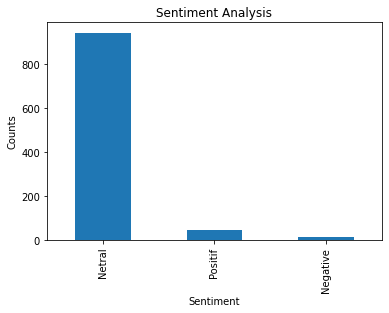

In [ ]:
# memvisualisasikan data berbentuk bar
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# fungsi untuk menampilkan wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

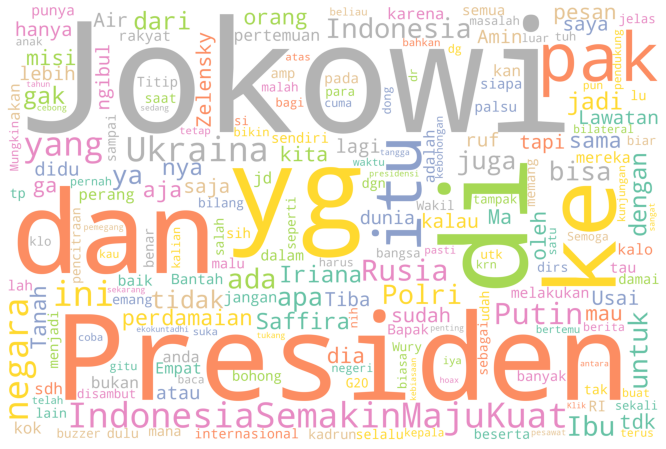

In [ ]:
# tampilkan data kedalam wordcloud
all_words = ' '.join([tweets for tweets in df['tweet']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [ ]:
# simpan data frame tadi kedalam csv file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/PBA/dataset/data_tweets.csv')